In [1]:
import pandas_datareader as pdr
import pandas_datareader.data as web

from pprint import pprint
import numpy as np
import pandas as pd
#import pyfolio as pf
#import quantstats as qs
from datetime import date
from pandas_datareader.famafrench import get_available_datasets
from scipy.stats import spearmanr, pearsonr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from statsmodels.api import OLS, add_constant
from pathlib import Path
import seaborn as sns 
from datetime import datetime
from linearmodels.asset_pricing import TradedFactorModel, LinearFactorModel, LinearFactorModelGMM
#import finance_db

In [6]:
import yfinance as yf
import datetime as dt
import re

In [7]:
symbols = ['VDC', 'VDE', 'VFH', 'VNQ']
secs = ['CONSUMER ST', 'ENERGY', 'FINANCIALS', 'REAL ESTATE']

In [129]:
dic_sym = {symbols[i]: secs[i] for i in range(len(symbols))}

In [130]:
start = dt.datetime(2010,1,1)
end = dt.datetime(2020,12,31)

In [131]:
prices = yf.download(symbols, start=start, end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [132]:
print(prices)

                   VDC        VDE        VFH        VNQ
Date                                                   
2010-01-04   47.256649  59.149330  22.314377  26.038347
2010-01-05   47.299362  59.754776  22.563404  26.009111
2010-01-06   47.292263  60.442791  22.601137  25.962358
2010-01-07   47.292263  60.298317  23.038816  26.242908
2010-01-08   47.035900  60.752411  22.948271  26.050024
...                ...        ...        ...        ...
2020-12-23  160.665253  47.125889  67.422874  75.544212
2020-12-24  161.349274  46.731682  67.451088  76.205605
2020-12-28  162.398682  46.391220  67.705154  76.659874
2020-12-29  161.892715  46.122444  67.338173  76.005745
2020-12-30  161.986450  46.883987  67.742813  76.423668

[2768 rows x 4 columns]


In [11]:
SPY = yf.download('SPY', start=start, end=end)['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [12]:
SPY.head()

Date
2010-01-04    87.483192
2010-01-05    87.714752
2010-01-06    87.776512
2010-01-07    88.147041
2010-01-08    88.440407
Name: Adj Close, dtype: float64

In [13]:
#prices.columns = secs
prices['SPY'] = SPY.values

In [14]:
prices.head(10)

,VDC,VDE,VFH,VNQ,SPY
Date,,,,,
2010-01-04,47.256657,59.149315,22.314375,26.038336,87.483192
2010-01-05,47.299385,59.754776,22.563410,26.009123,87.714752
2010-01-06,47.292267,60.442795,22.601137,25.962364,87.776512
2010-01-07,47.292267,60.298313,23.038820,26.242908,88.147041
2010-01-08,47.035896,60.752407,22.948263,26.050032,88.440407
2010-01-11,47.199684,60.704247,22.940714,26.201990,88.563904
2010-01-12,47.413326,59.747925,22.661507,25.763628,87.737946
2010-01-13,47.740902,60.050640,22.872797,26.283823,88.479012
2010-01-14,47.712402,60.215740,23.023724,26.260441,88.718277


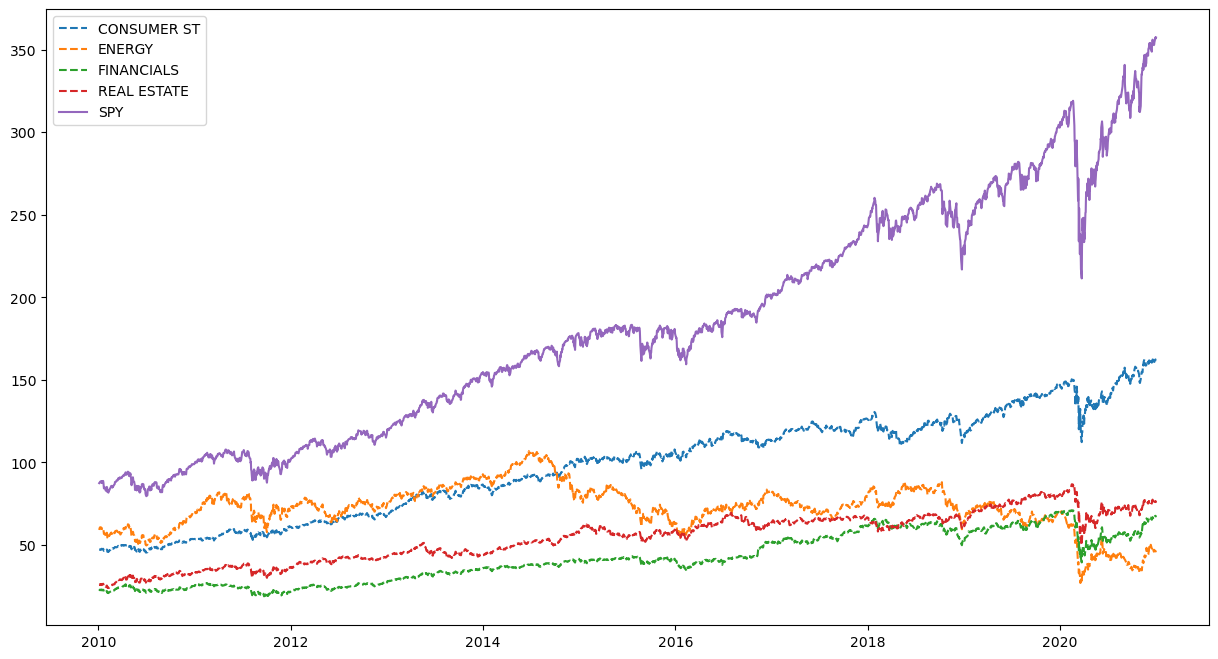

In [128]:
#plt.plot(prices.index, prices[['VDC', 'VDE', 'VFH', 'VNQ', 'SPY'],  label=['VDC', 'VDE', 'VFH', 'VNQ', 'SPY']])
plt.figure(figsize=(15, 8))
plt.plot(prices.index, prices.VDC, label=dic_sym.get('VDC'), linestyle='dashed')
plt.plot(prices.index, prices.VDE, label=dic_sym.get('VDE'), linestyle='dashed')
plt.plot(prices.index, prices.VFH, label=dic_sym.get('VFH'), linestyle='dashed')
plt.plot(prices.index, prices.VNQ, label=dic_sym.get('VNQ'), linestyle='dashed')
plt.plot(prices.index, prices.SPY, label='SPY')
plt.legend()
plt.show()

In [83]:
returns0 = prices.pct_change()
returns0 = returns0.dropna(how='all').dropna(axis=1)
returns0.head(10)

,VDC,VDE,VFH,VNQ,SPY
Date,,,,,
2010-01-05,0.000904,0.010236,0.011160,-0.001122,0.002647
2010-01-06,-0.000150,0.011514,0.001672,-0.001798,0.000704
2010-01-07,0.000000,-0.002390,0.019366,0.010806,0.004221
2010-01-08,-0.005421,0.007531,-0.003931,-0.007350,0.003328
2010-01-11,0.003482,-0.000793,-0.000329,0.005833,0.001396
2010-01-12,0.004526,-0.015754,-0.012171,-0.016730,-0.009326
2010-01-13,0.006909,0.005067,0.009324,0.020191,0.008446
2010-01-14,-0.000597,0.002749,0.006599,-0.000890,0.002704
2010-01-15,-0.005671,-0.008112,-0.017371,-0.007567,-0.011224


In [84]:
spy_returns = returns0['SPY']
spy_returns.shape

(2767,)

In [85]:
returns0.drop(['SPY'], axis=1, inplace=True)

In [86]:
returns0.shape

(2767, 4)

In [87]:
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(returns0)
chi_square_value, p_value

(7263.343086891116, 0.0)

In [88]:
# Kaiser-Meyer-Olkin (KMO) Test measures the suitability of data for factor analysis. 
# KMO values range between 0 and 1. Value of KMO less than 0.6 is considered inadequate.
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(returns0)
kmo_model

/Users/syang14/anaconda3/lib/python3.11/site-packages/factor_analyzer/utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


0.8014589011224001

In [89]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(n_factors=11, rotation=None)
fa.fit(returns0)
# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([3.07119846, 0.47058828, 0.27928468, 0.17892858])

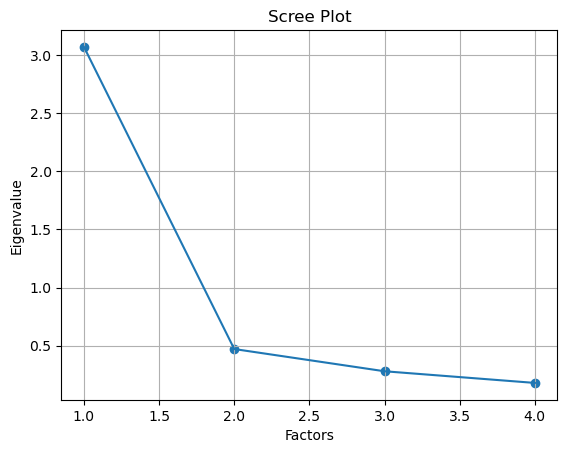

In [90]:
# Create scree plot using matplotlib
plt.scatter(range(1,returns0.shape[1]+1),ev)
plt.plot(range(1,returns0.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [91]:
fa = FactorAnalyzer(n_factors=2, rotation="varimax")
fa.fit(returns0)
loads = fa.loadings_
loads

array([[0.44930445, 0.66513116],
       [0.73465403, 0.36520633],
       [0.77305752, 0.54332472],
       [0.42086618, 0.80205509]])

In [92]:
list(returns0.columns)

['VDC', 'VDE', 'VFH', 'VNQ']

In [93]:
returns0.shape

(2767, 4)

In [94]:
new_variables = fa.transform(returns0)

In [95]:
new_variables.shape

(2767, 2)

In [96]:
new_variables.shape

(2767, 2)

In [97]:
# The alphas are evaluated at 0.87, 0.79 and 0.76, which indicates that they are useful and coherent. 
# We could use these new factors as variable for other analysis or for prediction. 

In [98]:
# The first two factors with different varabiles
#  'VDC', 'VDE', 'VFH', 'VNQ'

In [99]:
loadings = pd.DataFrame(fa.loadings_, columns=['Factor 1', 'Factor 2'], index=returns0.columns)
print('Factor Loadings \n%s' %loadings)

Factor Loadings 
     Factor 1  Factor 2
VDC  0.449304  0.665131
VDE  0.734654  0.365206
VFH  0.773058  0.543325
VNQ  0.420866  0.802055


In [100]:
loadings.sort_values(by=['Factor 1'])

,Factor 1,Factor 2
VNQ,0.420866,0.802055
VDC,0.449304,0.665131
VDE,0.734654,0.365206
VFH,0.773058,0.543325


In [101]:
# Strategy would be long (VFH, VDE) and short (VDC, VNQ)
symbols

['VDC', 'VDE', 'VFH', 'VNQ']

In [102]:
dic_sym = {symbols[i]: secs[i] for i in range(len(symbols))}

In [103]:
print ("Resultant dictionary is : " +  str(dic_sym))

Resultant dictionary is : {'VDC': 'CONSUMER ST', 'VDE': 'ENERGY', 'VFH': 'FINANCIALS', 'VNQ': 'REAL ESTATE'}


In [104]:
t_symbols = ['VDC', 'VDE', 'VFH', 'VNQ']

In [105]:
## Out-of-sample test
start = pd.Timestamp('2021-01')
end = pd.Timestamp('2021-06')
data_source = 'yahoo'

In [106]:
t_prices = yf.download(symbols, start=start, end=end)['Adj Close']

[*********************100%%**********************]  4 of 4 completed


In [107]:
t_prices.head()

,VDC,VDE,VFH,VNQ
Date,,,,
2021-01-04,161.330505,46.704807,67.573425,74.652069
2021-01-05,161.499176,48.899826,67.921600,74.761086
2021-01-06,161.911469,50.404991,71.064545,74.888283
2021-01-07,161.471085,51.256123,72.043182,74.742905
2021-01-08,162.295639,51.094860,71.854996,75.469727


In [108]:
t_returns = t_prices.pct_change()
t_returns = t_returns.dropna()
t_returns.head(10)

,VDC,VDE,VFH,VNQ
Date,,,,
2021-01-05,0.001045,0.046998,0.005153,0.001460
2021-01-06,0.002553,0.030781,0.046273,0.001701
2021-01-07,-0.002720,0.016886,0.013771,-0.001941
2021-01-08,0.005107,-0.003146,-0.002612,0.009724
2021-01-11,-0.009180,0.015781,0.003798,-0.013242
2021-01-12,-0.002855,0.036768,0.011611,0.002318
2021-01-13,0.001402,-0.008991,-0.002192,0.012171
2021-01-14,-0.003618,0.031586,0.006074,0.005892
2021-01-15,-0.004451,-0.038437,-0.017343,0.011476


In [110]:
t_returns['Long'] = t_returns[['VFH', 'VDE']].sum(axis=1)/2

In [111]:
t_returns['Short'] = -1*t_returns[['VDC', 'VNQ']].sum(axis=1)/2

In [112]:
t_returns['Portfolio'] = t_returns[['Long', 'Short']].sum(axis=1)

In [113]:
t_returns.head()

,VDC,VDE,VFH,VNQ,Long,Short,Portfolio
Date,,,,,,,
2021-01-05,0.001045,0.046998,0.005153,0.001460,0.026075,-0.001253,0.024822
2021-01-06,0.002553,0.030781,0.046273,0.001701,0.038527,-0.002127,0.036400
2021-01-07,-0.002720,0.016886,0.013771,-0.001941,0.015328,0.002331,0.017659
2021-01-08,0.005107,-0.003146,-0.002612,0.009724,-0.002879,-0.007415,-0.010295
2021-01-11,-0.009180,0.015781,0.003798,-0.013242,0.009789,0.011211,0.021000


In [114]:
cum_returns = t_returns.cumsum()
cum_returns.tail(5)

,VDC,VDE,VFH,VNQ,Long,Short,Portfolio
Date,,,,,,,
2021-05-24,0.084114,0.372322,0.270022,0.197359,0.321172,-0.140736,0.180435
2021-05-25,0.083522,0.351852,0.258936,0.197056,0.305394,-0.140289,0.165105
2021-05-26,0.083629,0.362440,0.264160,0.201498,0.313300,-0.142564,0.170737
2021-05-27,0.076682,0.364370,0.274338,0.199186,0.319354,-0.137934,0.181420
2021-05-28,0.079014,0.365471,0.276589,0.205230,0.321030,-0.142122,0.178908


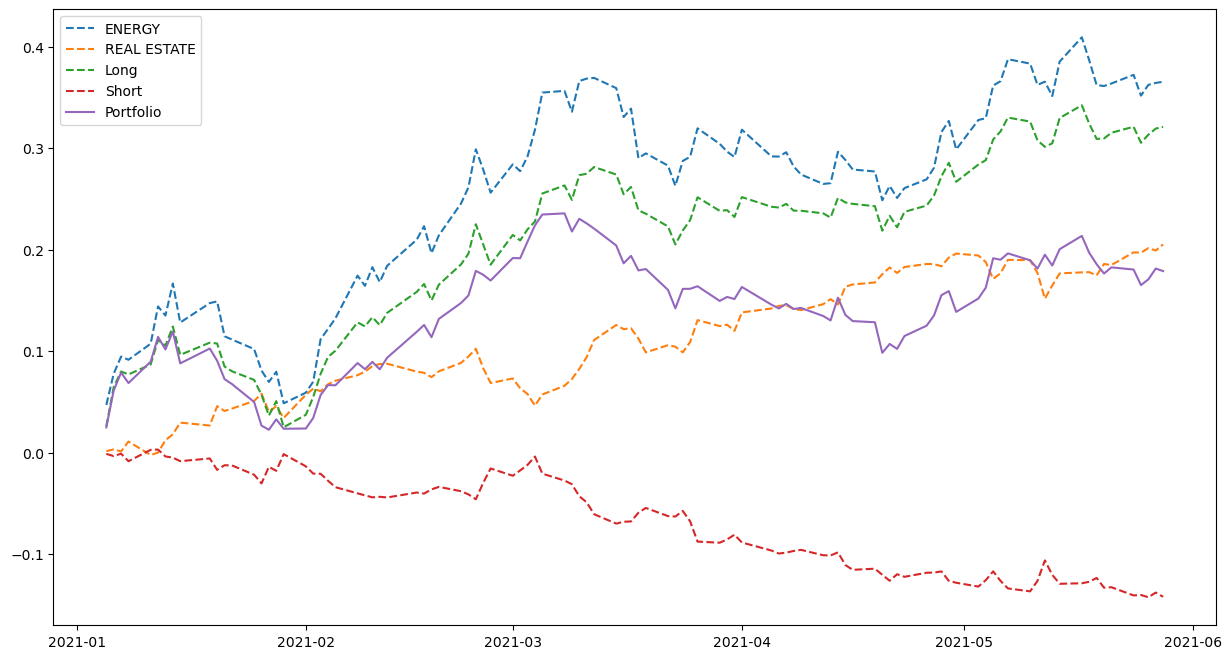

In [118]:
#plt.plot(cum_returns.index, cum_returns[['VDC', 'VDE', 'VFH', 'VNQ', 'Long', 'Short']],  label=['VDC', 'VDE', 'VFH', 'VNQ', 'Long', 'Long', 'Short']])
#ax1 = plt.plot(cum_returns.index, cum_returns[['VDC', 'VDE', 'VFH', 'VNQ', 'Long', 'Short']],  label=['VDC', 'VDE', 'VFH', 'VNQ', 'Long', 'Long', 'Short'])
plt.figure(figsize=(15, 8))
plt.plot(cum_returns.index, cum_returns.VDE, label=dic_sym.get('VDE'), linestyle='dashed')
plt.plot(cum_returns.index, cum_returns.VNQ, label=dic_sym.get('VNQ'), linestyle='dashed')
plt.plot(cum_returns.index, cum_returns.Long, label='Long', linestyle='dashed')
plt.plot(cum_returns.index, cum_returns.Short, label='Short', linestyle='dashed')
plt.plot(cum_returns.index, cum_returns.Portfolio, label='Portfolio')
plt.legend()
plt.show()

In [119]:
portfolio_return = t_returns[['Long', 'Short']].sum(axis=1)

In [120]:
portfolio_return.head()

Date
2021-01-05    0.024822
2021-01-06    0.036400
2021-01-07    0.017659
2021-01-08   -0.010295
2021-01-11    0.021000
dtype: float64

In [121]:
cum_returns.tail(1)

,VDC,VDE,VFH,VNQ,Long,Short,Portfolio
Date,,,,,,,
2021-05-28,0.079014,0.365471,0.276589,0.20523,0.32103,-0.142122,0.178908


In [122]:
sharpe_ratio = (252**0.5)*t_returns.Portfolio.mean()/t_returns.Portfolio.std()

In [123]:
sharpe_ratio

1.9735625188507246

In [125]:
(252**0.5)*t_returns.VDE.mean()/t_returns.VDE.std()

2.7730430782634268

In [126]:
(252**0.5)*t_returns.VNQ.mean()/t_returns.VNQ.std()

3.597467364427992